In [1]:
import json
import requests
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go

In [2]:
id = 'bd91024b-fab2-49b3-ba2b-8ccf7852c9df'
key = 'BQ0fP1QiDrAQNqZdYjip'

In [3]:
symbol = 'AAPL.NASDAQ'
duration = 60 * 60 * 24 #сутки в секундах
link = f'https://api-demo.exante.eu/md/2.0/ohlc/{symbol}/{duration}'

In [4]:
headers = {
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36 OPR/69.0.3686.77'
}
params = {
    'size': 300,
    'type': 'quotes'
}

In [5]:
request = requests.get(link, auth=(id, key), headers=headers, params=params)

In [6]:
df = pd.DataFrame(json.loads(request.text))
df

,timestamp,open,low,close,high
0,1594857600000,387.45,383.095,385.075,389.63
1,1594771200000,389.315,385.97,388.865,397.88
2,1594684800000,382.4,375.53,391.07,391.13
3,1594598400000,386.85,381.1,384.55,399.81
4,1594339200000,382,378.835,383.825,384.105
...,...,...,...,...,...
295,1559692800000,182.02,181.135,181.81,184.985
296,1559606400000,174.27,173.805,181.525,181.525
297,1559520000000,173.605,170.4,173.94,177.915
298,1559260800000,175.45,174.22,174.875,177.985


**Приведем timestamp к формату даты**

In [7]:
date = []
for i in range(len(df)):
    date.append(datetime.fromtimestamp(df.timestamp[i] / 1000).strftime('%Y-%m-%d'))
df['date'] = date

In [8]:
df = df[['date', 'open', 'low', 'close', 'high']]
df

,date,open,low,close,high
0,2020-07-16,387.45,383.095,385.075,389.63
1,2020-07-15,389.315,385.97,388.865,397.88
2,2020-07-14,382.4,375.53,391.07,391.13
3,2020-07-13,386.85,381.1,384.55,399.81
4,2020-07-10,382,378.835,383.825,384.105
...,...,...,...,...,...
295,2019-06-05,182.02,181.135,181.81,184.985
296,2019-06-04,174.27,173.805,181.525,181.525
297,2019-06-03,173.605,170.4,173.94,177.915
298,2019-05-31,175.45,174.22,174.875,177.985


In [ ]:
fig = go.Figure(
    data=[
        go.Candlestick(
        x=df.date,
        open=df.open,
        high=df.high,
        low=df.low,
        close=df.close)
    ]
)

fig.update_layout(
    xaxis_rangeslider_visible=False,
    title={
        'text': "График акций компании Apple",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size': 20
    }
)

fig.show()

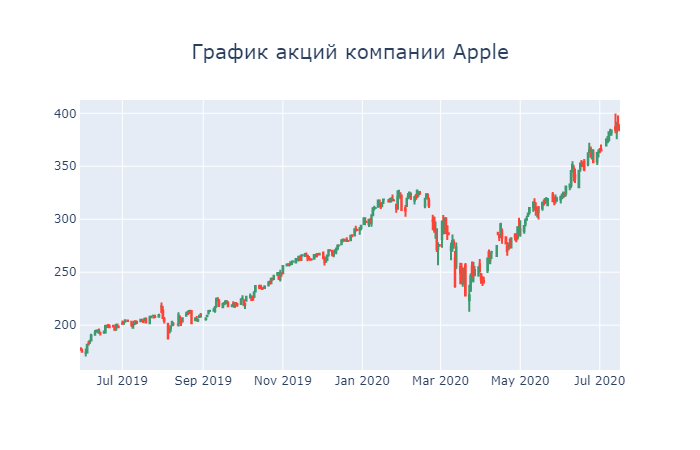

In [10]:
df_json = json.loads(df.to_json(index=False, orient='table'))['data']

In [11]:
with open('shares.json', 'w') as j:
    json.dump(df_json, j)